<h3> Importar a Base de dados </h3>

In [3]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV        200 non-null float64
Radio     200 non-null float64
Jornal    200 non-null float64
Vendas    200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


None

<h3>Realizar a análise exploratória</h3>
    <p>Vamos tentar visualizar como as informações de cada item estão distribuídas</p>
    <p>Vamos ver a correlação entre cada um dos itens</p>
  

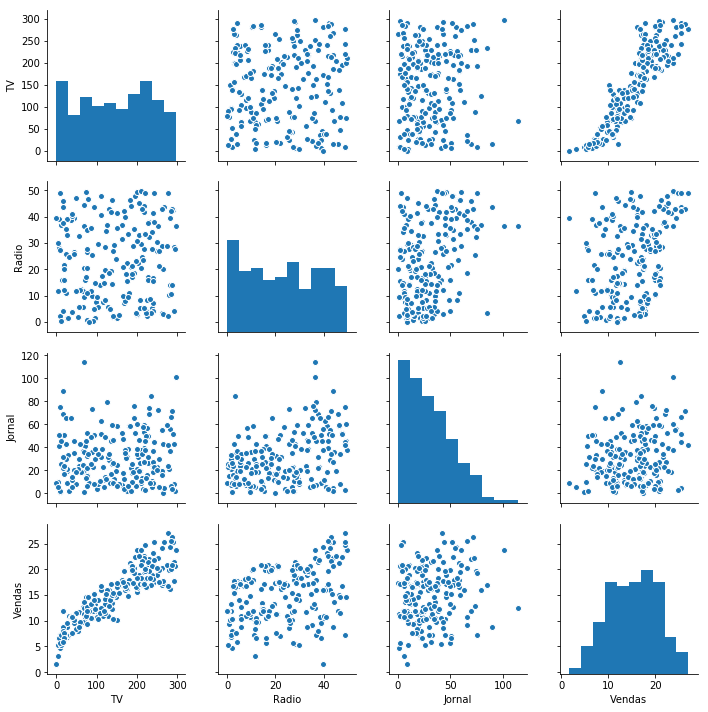

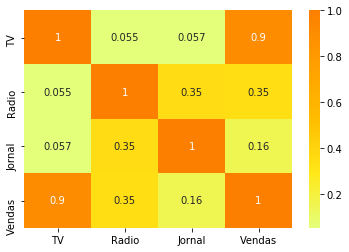

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(tabela)
plt.show()

sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)
plt.show()


<h3>Parte da realização do treinamento do Modelo de Machine Learning</h3>
<p>Separando em dados de treino e dados de teste</p>

In [19]:
from sklearn.model_selection import train_test_split

x = tabela.drop("Vendas", axis=1)
y = tabela["Vendas"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

<h3>Temos um problema de regressão- Vamos escolher os modelos que vamos usar:</h3>
<p>Regressão Linear</p>
<p>RandomForest(Árvore de Decisão)</p>


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Crio a IA
linear = LinearRegression()
randomforest = RandomForestRegressor()

#Aplico o treino na IA
linear.fit(x_treino, y_treino)
randomforest.fit(x_treino, y_treino)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

<h3>Teste da IA e Avaliação do Melhor Modelo</h3>
<p>

In [22]:
from sklearn import metrics
teste_linear = linear.predict(x_teste)
teste_random = randomforest.predict(x_teste)

# r2
r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_random = metrics.r2_score(y_teste, teste_random )
print(r2_linear, r2_random)

# erro
erro_linear = metrics.mean_squared_error(y_teste, teste_linear)
erro_random = metrics.mean_squared_error(y_teste, teste_linear)
print(erro_linear, erro_random)

0.8635279816713853 0.9212229631093459
3.8059073854562584 3.8059073854562584


<h3>Visualização Gráfica das Previsões</h3>

In [30]:
tabela_comparacao = pd.DataFrame()
tabela_comparacao["Vendas Reais"] = y_teste
tabela_comparacao["Previsao Random"] = teste_random
tabela_comparacao = tabela_comparacao.reset_index(drop=True)

display(tabela_comparacao)
    

,Vendas Reais,Previsao Random
0,8.5,8.50
1,18.4,17.28
2,20.6,17.52
3,10.8,10.55
4,16.9,17.82
5,17.1,16.59
6,22.2,23.28
7,20.1,18.93
8,12.0,12.42
9,23.8,23.15


<h3> Qual a importância de cada variável para as vendas ? </h3>

In [ ]:
print("TV", "RADIO", "JORNAL")
print(randomforest.feature_importances_)